In [1]:
!head -n 10 pydata-book-2nd-Edition/datasets/babynames/yob1880.txt

In [2]:
import pandas as pd
names1880 = pd.read_csv('pydata-book-2nd-Edition/datasets/babynames/yob1880.txt',
                       names = ['name', 'sex', 'births'])

names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [6]:
years = range(1880, 2011)
pieces = []
columns = ['name','sex', 'births']

for year in years:
    path = 'pydata-book-2nd-Edition/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


<AxesSubplot:title={'center':'Total bitrhs by sex and year'}, xlabel='year'>

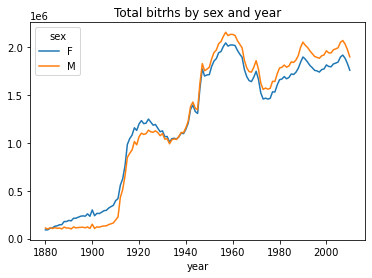

In [8]:
total_births = names.pivot_table('births', index='year',
                                columns = 'sex', aggfunc=sum)
total_births.plot(title='Total bitrhs by sex and year')

In [14]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [15]:
names

,name,sex,births,year,pop,prop
0,Mary,F,7065,1880,0.077643,0.077643
1,Anna,F,2604,1880,0.028618,0.028618
2,Emma,F,2003,1880,0.022013,0.022013
3,Elizabeth,F,1939,1880,0.021309,0.021309
4,Minnie,F,1746,1880,0.019188,0.019188
...,...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003,0.000003
1690780,Zyonne,M,5,2010,0.000003,0.000003
1690781,Zyquarius,M,5,2010,0.000003,0.000003
1690782,Zyran,M,5,2010,0.000003,0.000003


In [16]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [19]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
#Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [20]:
top1000

,name,sex,births,year,pop,prop
0,Mary,F,7065,1880,0.077643,0.077643
1,Anna,F,2604,1880,0.028618,0.028618
2,Emma,F,2003,1880,0.022013,0.022013
3,Elizabeth,F,1939,1880,0.021309,0.021309
4,Minnie,F,1746,1880,0.019188,0.019188
...,...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102,0.000102
261873,Destin,M,194,2010,0.000102,0.000102
261874,Jaquan,M,194,2010,0.000102,0.000102
261875,Jaydan,M,194,2010,0.000102,0.000102


### Analyzing Naming Trends

In [21]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [24]:
total_births = top1000.pivot_table('births', index='year', columns='name', 
                                  aggfunc=sum)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

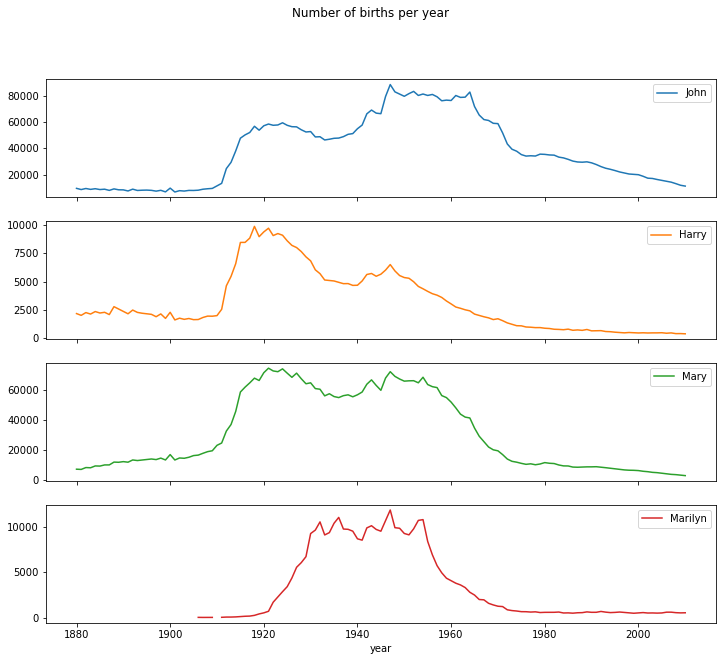

In [26]:
total_births.info()
subset = total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title="Number of births per year")